In [ ]:
import urllib.request
from matplotlib.pyplot import imshow
import numpy as np
import cv2
from keras.preprocessing.image import img_to_array
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Sequential
import tensorflow as tf


In [ ]:
url_1 = 'https://raw.githubusercontent.com/bnsreenu/python_for_microscopists/master/images/einstein_mona_lisa/einstein_original.jpg'
url_2 = 'https://raw.githubusercontent.com/bnsreenu/python_for_microscopists/master/images/einstein_mona_lisa/monalisa_original.jpg'
url_response_1 = urllib.request.urlopen(url_1)
url_response_2 = urllib.request.urlopen(url_2)
img_array_1 = np.array(bytearray(url_response_1.read()), dtype=np.uint8)
img_array_2 = np.array(bytearray(url_response_2.read()), dtype=np.uint8)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 128, 128, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 8)       2312      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 64, 64, 8)        0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 8)         584       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 32, 32, 8)        0

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


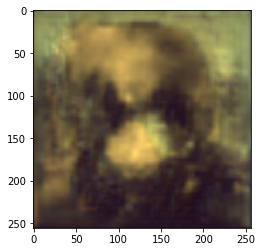

In [ ]:
from matplotlib.pyplot import imshow
import numpy as np
import cv2
from keras.preprocessing.image import img_to_array
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Sequential


SIZE=256  #Limiting to 256 size image as my laptop cannot handle larger image. 
img_data=[]

img = cv2.imdecode(img_array_1, -1)   #Change 1 to 0 for Grey scale images
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  #Changing BGR to RGB to show images in true colors
img=cv2.resize(img,(SIZE, SIZE))
img_data.append(img_to_array(img))

img_array = np.reshape(img_data, (len(img_data), SIZE, SIZE, 3))
img_array = img_array.astype('float32') / 255.


img_data2=[]  #Second image to be provided as ground truth. 

img2 = cv2.imdecode(img_array_2, -1)  #Change 1 to 0 for Grey scale images
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)#Changing BGR to RGB to show images in true colors
img2=cv2.resize(img2,(SIZE, SIZE))
img_data2.append(img_to_array(img2))

img_array2 = np.reshape(img_data2, (len(img_data2), SIZE, SIZE, 3))
img_array2 = img_array2.astype('float32') / 255.

#Define Autoencoder model. 

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(SIZE, SIZE, 3)))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
 

model.add(MaxPooling2D((2, 2), padding='same'))
     
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(3, (3, 3), activation='relu', padding='same'))

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])
model.summary()


callbacks = [
        tf.keras.callbacks.EarlyStopping(patience=20, monitor='loss'),
        tf.keras.callbacks.TensorBoard(log_dir='logs')]

model.fit(img_array, img_array2,
        epochs=5000,                  #1000s of epochs needed for good results. Use GPU.
        shuffle=True,callbacks=callbacks)           #Shuffle data for each epoch


print("Output")
pred = model.predict(img_array)   #Predict model on the same input array.

#In reality, train on 1000s of input images and predict on images that the training 
#algorithm never saw. 

imshow(pred[0].reshape(SIZE,SIZE,3), cmap="gray")


#img2 = Image.fromarray(pred[0], 'RGB')

11501568/11490434 [==============================] - 0s 0us/step


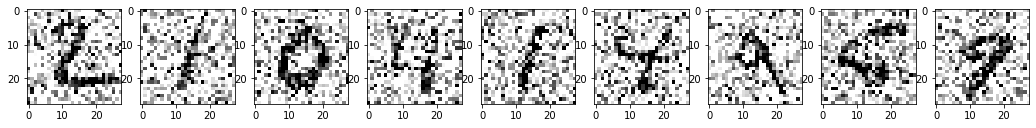

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 8)         2312      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 8)          0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 8)           584       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 4, 4, 8)          0

In [ ]:

from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Sequential

import numpy as np
import matplotlib.pyplot as plt

(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

#adding some noise
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape) 
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape) 

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

#Displaying images with noise
plt.figure(figsize=(20, 2))
for i in range(1,10):
    ax = plt.subplot(1, 10, i)
    plt.imshow(x_test_noisy[i].reshape(28, 28), cmap="binary")
plt.show()


model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
 

model.add(MaxPooling2D((2, 2), padding='same'))
 
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(1, (3, 3), activation='relu', padding='same'))

model.compile(optimizer='adam', loss='mean_squared_error')

model.summary()

model.fit(x_train_noisy, x_train, epochs=10, batch_size=256, shuffle=True, 
          validation_data=(x_test_noisy, x_test))







In [ ]:
model.evaluate(x_test_noisy, x_test)

model.save('denoising_autoencoder.model')

no_noise_img = model.predict(x_test_noisy)

no_noise_img

313/313 [==============================] - 1s 4ms/step - loss: 0.0234
INFO:tensorflow:Assets written to: denoising_autoencoder.model/assets


array([[[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]]],


       [[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
 

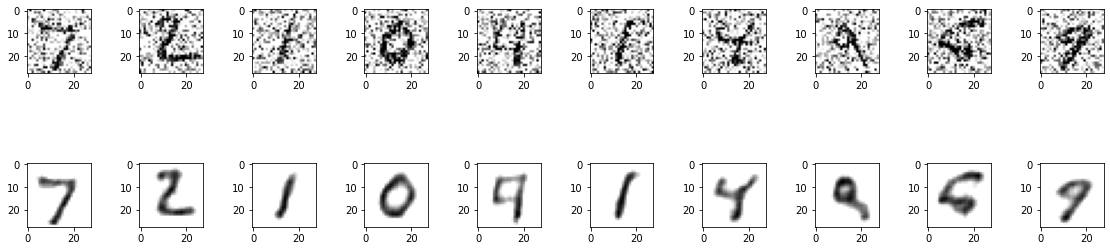

In [ ]:
plt.figure(figsize=(40, 4))
for i in range(10):
    # display original
    ax = plt.subplot(3, 20, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28), cmap="binary")
    
    # display reconstructed (after noise removed) image
    ax = plt.subplot(3, 20, 40 +i+ 1)
    plt.imshow(no_noise_img[i].reshape(28, 28), cmap="binary")

plt.show()

In [ ]:
from torchvision.datasets.utils import download_url
import os

In [ ]:
# Dowload the dataset
dataset_url = "https://s3.amazonaws.com/fast-ai-imageclas/cifar10.tgz"
download_url(dataset_url, '.')

In [ ]:
!pip install git+https://github.com/Joeclinton1/google-images-download.git

In [10]:
from google_images_download import google_images_download
import os

In [ ]:
response = google_images_download.googleimagesdownload()

arguments = {"keywords":'national park',"limit":100,"print_urls":False}
paths = response.download(arguments)

In [ ]:
# entries = os.listdir('/content/downloads/national park/')
# Walking a directory tree and printing the names of the directories and files
for paths, dirnames, files in os.walk('/content/downloads/'):
    print(f'Found directory: {paths}')
    # for file_name in files:
    #     print(file_name)

Found directory: /content/downloads/
Found directory: /content/downloads/national park


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [11]:
DATA_DIR  = './downloads'
print(os.listdir(DATA_DIR+'/national park')[:10])

['42.yellowstone%20tours.jpg', '98.vc_amazingalternativestocaliforniasnatparks_anzaborrego_st_rf_917923758_1280x640.jpg', '58.welcome-to-zion-national-park.jpg', '82.sip-primary-logo-600.png', '83.glacier-ss.jpg', '77.stock_43514660_cziqgg.jpg', '80.08travel-parks-top-still-mediumsquareat3x.jpg', '27.1917-sequoia-national-park-sign-visalia-zoom-rectangle-900x770.jpg', '95.holiday-inn-west-yellowstone-5989229384-2x1.jpg', '20.bogdkhan_uul_strictly_protected_area%2c_mongolia_%28149199747%29.jpg']


In [12]:
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img

train_datagen = ImageDataGenerator(rescale=1. / 255)

#Resize images, if needed
train = train_datagen.flow_from_directory(DATA_DIR, 
                                          target_size=(256, 256), 
                                          batch_size=340, 
                                          class_mode=None)



/usr/local/lib/python3.7/dist-packages/requests/__init__.py:91: RequestsDependencyWarning: urllib3 (1.26.7) or chardet (3.0.4) doesn't match a supported version!
  RequestsDependencyWarning)


Found 145 images belonging to 1 classes.


In [13]:
from keras.layers import Conv2D, UpSampling2D
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from skimage.color import rgb2lab, lab2rgb
from skimage.transform import resize
from skimage.io import imsave, imshow
import numpy as np
import tensorflow as tf

In [14]:
X =[]
Y =[]
for img in train[0]:
  try:
      lab = rgb2lab(img)
      X.append(lab[:,:,0]) 
      Y.append(lab[:,:,1:] / 128) #A and B values range from -127 to 128, 
      #so we divide the values by 128 to restrict values to between -1 and 1.
  except:
     print('error')
X = np.array(X)
Y = np.array(Y)
X = X.reshape(X.shape+(1,)) #dimensions to be the same for X and Y
print(X.shape)
print(Y.shape)

(145, 256, 256, 1)
(145, 256, 256, 2)


In [16]:

from keras.layers import Conv2D, UpSampling2D
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from skimage.color import rgb2lab, lab2rgb
from skimage.transform import resize
from skimage.io import imsave
import numpy as np
import tensorflow as tf

# path = 'images/colorization/'


#Convert from RGB to Lab
"""
by iterating on each image, we convert the RGB to Lab. 
Think of LAB image as a grey image in L channel and all color info stored in A and B channels. 
The input to the network will be the L channel, so we assign L channel to X vector. 
And assign A and B to Y.
"""

# X =[]
# Y =[]
# for img in train[0]:
#   try:
#       lab = rgb2lab(img)
#       X.append(lab[:,:,0]) 
#       Y.append(lab[:,:,1:] / 128) #A and B values range from -127 to 128, 
#       #so we divide the values by 128 to restrict values to between -1 and 1.
#   except:
#      print('error')
# X = np.array(X)
# Y = np.array(Y)
# X = X.reshape(X.shape+(1,)) #dimensions to be the same for X and Y
# print(X.shape)
# print(Y.shape)


#Encoder

model = Sequential()
model.add(Conv2D(64, (3, 3), activation='relu', padding='same', strides=2, input_shape=(256, 256, 1)))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(128, (3,3), activation='relu', padding='same', strides=2))
model.add(Conv2D(256, (3,3), activation='relu', padding='same'))
model.add(Conv2D(256, (3,3), activation='relu', padding='same', strides=2))
model.add(Conv2D(512, (3,3), activation='relu', padding='same'))
model.add(Conv2D(512, (3,3), activation='relu', padding='same'))
model.add(Conv2D(256, (3,3), activation='relu', padding='same'))

#Decoder
#Decoder
#Note: For the last layer we use tanh instead of Relu. 
#This is because we are colorizing the image in this layer using 2 filters, A and B.
#A and B values range between -1 and 1 so tanh (or hyperbolic tangent) is used
#as it also has the range between -1 and 1. 
#Other functions go from 0 to 1.
model.add(Conv2D(128, (3,3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(64, (3,3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(32, (3,3), activation='relu', padding='same'))
model.add(Conv2D(16, (3,3), activation='relu', padding='same'))
model.add(Conv2D(2, (3, 3), activation='tanh', padding='same'))
model.add(UpSampling2D((2, 2)))
model.compile(optimizer='adam', loss='mse' , metrics=['accuracy'])
model.summary()


callbacks = [
        tf.keras.callbacks.EarlyStopping(patience=20, monitor='loss'),
        tf.keras.callbacks.TensorBoard(log_dir='logs')]



model.fit(X,Y,validation_split=0.1, epochs=5, batch_size=16,callbacks=callbacks)

model.save('other_files/colorize_autoencoder.model')


###########################################################
#Load saved model and test on images.
#colorize_autoencoder300.model is trained on 300 epochs
#


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 64)      640       
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 128)     73856     
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 128)       147584    
                                                                 
 conv2d_3 (Conv2D)           (None, 64, 64, 256)       295168    
                                                                 
 conv2d_4 (Conv2D)           (None, 32, 32, 256)       590080    
                                                                 
 conv2d_5 (Conv2D)           (None, 32, 32, 512)       1180160   
                                                                 
 conv2d_6 (Conv2D)           (None, 32, 32, 512)       2

In [ ]:
"""
tf.keras.models.load_model(
    'other_files/colorize_autoencoder300.model',
    custom_objects=None,
    compile=True)
img1_color=[]
img1=img_to_array(load_img('images/sunset.png'))
img1 = resize(img1 ,(256,256))
img1_color.append(img1)
img1_color = np.array(img1_color, dtype=float)
img1_color = rgb2lab(1.0/255*img1_color)[:,:,:,0]
img1_color = img1_color.reshape(img1_color.shape+(1,))
output1 = model.predict(img1_color)
output1 = output1*128
result = np.zeros((256, 256, 3))
result[:,:,0] = img1_color[0][:,:,0]
result[:,:,1:] = output1[0]
imsave("result.png", lab2rgb(result))
"""

In [21]:
tf.keras.models.load_model(
    './other_files/colorize_autoencoder.model',
    custom_objects=None,
    compile=True)
img1_color=[]
img1=img_to_array(load_img('https://raw.githubusercontent.com/bnsreenu/python_for_microscopists/master/images/einstein_mona_lisa/einstein_original.jpg'))
img1 = resize(img1 ,(256,256))
img1_color.append(img1)
img1_color = np.array(img1_color, dtype=float)
img1_color = rgb2lab(1.0/255*img1_color)[:,:,:,0]
img1_color = img1_color.reshape(img1_color.shape+(1,))
output1 = model.predict(img1_color)
output1 = output1*128
result = np.zeros((256, 256, 3))
result[:,:,0] = img1_color[0][:,:,0]
result[:,:,1:] = output1[0]
imshow(lab2rgb(result))
imsave("result.png", lab2rgb(result))

FileNotFoundError: ignored

In [ ]:
from google.colab import files
files.download('fruits.h5')